### 2.   Load Dataset

**[2.1]** Import the torch and torchvision packages

In [1]:
#Solution
import torch
import torchvision

**[2.2]** Create a variable called `download` containing the value `True`

In [2]:
#Solution
download = True

**[2.3]** Define a transformation pipeline that will convert the images into tensors and normalise them


In [3]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

**[2.4]** Instantiate a torchvision.datasets.MNIST() for the training set, downlows it into `/data/raw/` folder and perform the transformation defined earlier. Save the results in a variable called `train_data`

In [4]:
# Solution
train_data = torchvision.datasets.MNIST('../data/raw/', train=True, download=download, transform=transform)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


**[2.5]** Instantiate a torchvision.datasets.MNIST() for the testing set, downlows it into `/data/raw/` folder and perform the transformation defined earlier. Save the results in a variable called `test_data`

In [5]:
# Solution
test_data = torchvision.datasets.MNIST('../data/raw/', train=False, download=download, transform=transform)

### 3. Prepare Data

**[3.1]** Create 2 variables called `batch_size_train` and `batch_size_test` that will respectively take the values 64 and 10

In [6]:
# Solution
batch_size_train = 64
batch_size_test = 10

**[3.2]** Import DataLoader from torch.utils.data

In [7]:
# Solution:
from torch.utils.data import DataLoader

**[3.3]** Instantiate a `torch.utils.data.DataLoader()` on the training data, with the relevant batch size and with shuffle. Save the reults in a variable called `train_loader`

In [8]:
# Solution
train_loader = DataLoader(train_data, batch_size=batch_size_train, shuffle=True)

**[3.4]** Instantiate a `torch.utils.data.DataLoader()` on the testing data, with the relevant batch size and with shuffle. Save the reults in a variable called `test_loader`

In [9]:
# Solution
test_loader = DataLoader(test_data, batch_size=batch_size_test, shuffle=True)

**[3.5]** Create a generator on the test data loader and extract the first observation

In [10]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

**[3.6]** Print the dimensions of the first image

In [11]:
# Solution
example_data.shape

torch.Size([10, 1, 28, 28])

**[3.7]** Import matplotlib.pyplot as plt

In [12]:
# Solution
import matplotlib.pyplot as plt

**[3.8]** Print the first image with its corresponding target

Text(0.5, 1.0, 'Ground Truth: 9')

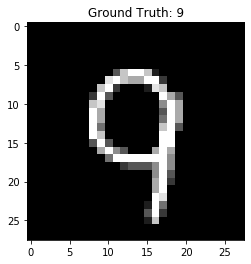

In [13]:
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets[0]))

### 4. Define Architecture

**[4.1]** Import torch.nn as n, torch.nn.functional as F and torch.optim as optim

In [14]:
# Solution
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

**[4.2]** Create a class called `PytorchCNN` that inherits from `nn.Module` with:
- attributes:
    - `conv1`: fully-connected layer with 128 filters of size 3
    - `conv2`: fully-connected layer with 64 filters of size 3
    - `fc1`: fully-connected layer with 128 neurons
    - `fc2`: fully-connected layer with 10 neurons
    - `softmax`: Softmax activation function
- methods:
    - `forward()` with `inputs` as input parameter and will sequentially add the 2 convolution layers with relu and max pool of size 2 followed the 2 full-connected layers respectively with relu and softmax

In [15]:
# Solution:
class PytorchCNN(nn.Module):
    def __init__(self):
        super(PytorchCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, kernel_size=3)
        self.conv2 = nn.Conv2d(128, 64, kernel_size=3)
        self.fc1 = nn.Linear(1600, 128)
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

**[4.3]** Instantiate a PytorchCNN and save it into a variable called `model` 

In [16]:
# Solution:
model = PytorchCNN()

**[4.4]** Import the `get_device` function from src.models.pytorch 

In [17]:
# Solution:
from src.models.pytorch import get_device

**[4.5]** Get the device available and set to the model to use it

In [18]:
# Solution:
device = get_device()
model.to(device)

PytorchCNN(
  (conv1): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

### 5. Train the model

**[5.1]** Import train_classification and test_classification from src.models.pytorch

In [19]:
# Solution:
from src.models.pytorch import train_classification, test_classification

**[5.2]** Instantiate a `nn.CrossEntropyLoss()` and save it into a variable called `criterion`

In [20]:
# Solution:
criterion = nn.CrossEntropyLoss()

**[5.3]** Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.001 as learning rate and save it into a variable called optimizer

In [21]:
# Solution:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**[5.4]** Create 2 variables called `N_EPOCHS` and `BATCH_SIZE` that will respectively take the values 5 and 32

In [27]:
# Solution:
N_EPOCHS = 5
BATCH_SIZE = 32

**[5.5]** Create a for loop that will iterate through the specified number of epochs and will train the model with the training set and assess the performance on the validation set and print their scores

In [28]:
# Solution:
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_classification(train_data, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_acc = test_classification(test_data, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)

    print(f'Epoch: {epoch}')
    print(f'\t(train)\t|\tLoss: {train_loss:.4f}\t|\tAcc: {train_acc * 100:.1f}%')
    print(f'\t(valid)\t|\tLoss: {valid_loss:.4f}\t|\tAcc: {valid_acc * 100:.1f}%')

Epoch: 0
	(train)	|	Loss: 0.0499	|	Acc: 86.6%
	(valid)	|	Loss: 0.0496	|	Acc: 87.4%
Epoch: 1
	(train)	|	Loss: 0.0477	|	Acc: 93.3%
	(valid)	|	Loss: 0.0463	|	Acc: 98.2%
Epoch: 2
	(train)	|	Loss: 0.0463	|	Acc: 97.9%
	(valid)	|	Loss: 0.0463	|	Acc: 98.3%
Epoch: 3
	(train)	|	Loss: 0.0462	|	Acc: 98.1%
	(valid)	|	Loss: 0.0464	|	Acc: 97.9%
Epoch: 4
	(train)	|	Loss: 0.0462	|	Acc: 98.3%
	(valid)	|	Loss: 0.0461	|	Acc: 98.7%


**[5.6]** Save the model into the `models` folder

In [29]:
# Solution:
torch.save(model, "../models/pytorch_mnist_cnn.pt")